# Loop dimers

In [1]:
# %load_ext lab_black
# Python standard library
from glob import glob
import os
import socket
import sys

# 3rd party library imports
import matplotlib.pyplot as plt
import pandas as pd
import pyrosetta
import numpy as np
import scipy
import seaborn as sns
from tqdm.auto import tqdm  # jupyter compatible progress bar

tqdm.pandas()  # link tqdm to pandas
# Notebook magic
# save plots in the notebook
%matplotlib inline
# reloads modules automatically before executing cells
%load_ext autoreload
%autoreload 2
print(f"running in directory: {os.getcwd()}")  # where are we?
print(f"running on node: {socket.gethostname()}")  # what node are we on?

running in directory: /mnt/home/broerman/projects/crispy_shifty/projects/crispy_shifty_dimers
running on node: dig32


In [1]:
sys.path.insert(0, "/home/broerman/projects/crispy_shifty")
from crispy_shifty.utils.io import gen_array_tasks

design_list_file = "/home/broerman/projects/crispy_shifty/projects/crispy_shifty_dimers/02_design_filter_3/filtered_designs.list"
output_path = "/home/broerman/projects/crispy_shifty/projects/crispy_shifty_dimers/03_close_loops"

# Format as a string of key value pairs with no leading dashes on the argument names
options = "out:level 100 holes:dalphaball /home/bcov/ppi/tutorial_build/main/source/external/DAlpahBall/DAlphaBall.gcc indexed_structure_store:fragment_store /home/bcov/sc/scaffold_comparison/data/ss_grouped_vall_all.h5 precompute_ig true"

gen_array_tasks(distribute_func='crispy_shifty.protocols.looping.loop_dimer',
                design_list_file=design_list_file,
                output_path=output_path,
                queue='short',
                memory='8G',
                nstruct=1,
                nstruct_per_task=50,
                options=options,
                simulation_name='03_close_loops')

/projects/crispy_shifty/envs/crispy/lib/python3.8/site-packages/dask_jobqueue/core.py:20: FutureWarning: tmpfile is deprecated and will be removed in a future release. Please use dask.utils.tmpfile instead.
  from distributed.utils import tmpfile


Run the following command with your desired environment active:
sbatch -a 1-$(cat /home/broerman/projects/crispy_shifty/projects/crispy_shifty_dimers/03_close_loops/tasks.cmds | wc -l) /home/broerman/projects/crispy_shifty/projects/crispy_shifty_dimers/03_close_loops/run.sh


In [3]:
# only need to run once
sys.path.insert(0, "/home/broerman/projects/crispy_shifty")
from crispy_shifty.utils.io import collect_score_file
output_path = "/home/broerman/projects/crispy_shifty/projects/crispy_shifty_dimers/03_close_loops"
collect_score_file(output_path, 'scores')

/projects/crispy_shifty/envs/crispy/lib/python3.8/site-packages/dask_jobqueue/core.py:20: FutureWarning: tmpfile is deprecated and will be removed in a future release. Please use dask.utils.tmpfile instead.
  from distributed.utils import tmpfile


https://docs.anaconda.com/anaconda/install



In [4]:
# Now that I've sufficiently sampled most of the inputs, read the new final scorefiles and filter

def read_scorefile(scores):
    import pandas as pd

    scores = pd.read_json(scores, orient="records", typ="frame", lines=True)
    scores = scores.T
    mat = scores.values
    n = mat.shape[0]
    dicts = list(mat[range(n), range(n)])
    index = scores.index
    tabulated_scores = pd.DataFrame(dicts, index=index)
    return tabulated_scores

os.chdir("/home/broerman/projects/crispy_shifty/projects/crispy_shifty_dimers")
output_path = os.path.join(os.getcwd(), "03_close_loops")
scores_path = os.path.join(output_path, "scores.json")
scores_df = read_scorefile(scores_path)

scores_df

,abego_str_A,abego_str_B,bb_clash,bb_clash_A,bb_clash_B,closure_type_A,closure_type_B,cms_ac_bn,cms_dhr,cms_dhr_ac,...,wnm_1,wnm_2,wnm_3,wnm_4,wnm_A,wnm_B,wnm_hlx,yhh_planarity,remodel_after_loop_B,remodel_before_loop_B
/home/broerman/projects/crispy_shifty/projects/crispy_shifty_dimers/03_close_loops/decoys/0000/03_close_loops_7a29eaf4497c4d0b8e6bf9849d490710.pdb.bz2,XAAAAAAAAAAAAAAAAAAABABAAAAAAAAAAAAAAAAAAAAAGB...,XAAAAAAAAAAAAAAAAAAABABAAAAAAAAAAAAAAAAAAAAAGB...,3941.285888671875,104.71414184570312,44.70890426635742,loop_remodel,loop_match,-1.0,563.556396484375,558.30126953125,...,0.3609829246997833,0.31814438104629517,0.390592098236084,0.3623688817024231,0.9452593324444125,0.6644087555430732,0.13865715265274048,0.0,NaN,NaN
/home/broerman/projects/crispy_shifty/projects/crispy_shifty_dimers/03_close_loops/decoys/0000/03_close_loops_751d888198554aa6a3a1f233411c9f12.pdb.bz2,XAAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAAAAGBAAA...,XAAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAAAAGBAAA...,114.33641815185547,56.87188720703125,56.87188720703125,loop_remodel,loop_remodel,-1.0,443.7602844238281,492.1199645996094,...,0.3382881283760071,0.34088292717933655,0.36499300599098206,0.3650842010974884,0.9878179683704182,0.7401864406856012,0.12189187854528427,0.0,3,1
/home/broerman/projects/crispy_shifty/projects/crispy_shifty_dimers/03_close_loops/decoys/0000/03_close_loops_63b5af9d88284226b46175a72f9c22e1.pdb.bz2,XAAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAAAAGBAAA...,XAAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAAAAGBAAA...,104.14654541015625,52.073272705078125,52.073272705078125,loop_remodel,loop_remodel,-1.0,481.5782775878906,710.6294555664062,...,0.2017073929309845,0.2055833488702774,0.194741889834404,0.1623128205537796,0.7819809655914953,0.744621290767556,0.1379878669977188,0.0,3,1
/home/broerman/projects/crispy_shifty/projects/crispy_shifty_dimers/03_close_loops/decoys/0000/03_close_loops_b354c617c3e649dbbe1dcf1c41b13009.pdb.bz2,XAAAAAAAAAAAAAAABABAAAAAAAAAAAAAAAAABBBAAAAAAA...,XAAAAAAAAAAAAAAABABAAAAAAAAAAAAAAAAABBBAAAAAAA...,2720.452880859375,41.73583221435547,41.73583221435547,loop_remodel,loop_remodel,-1.0,413.3935546875,648.1015625,...,0.30959227681159973,0.308468759059906,0.2922387719154358,0.29739323258399963,0.855336758143723,0.6750440484361641,0.1376577615737915,0.0,3,3
/home/broerman/projects/crispy_shifty/projects/crispy_shifty_dimers/03_close_loops/decoys/0000/03_close_loops_99080a1854744a57a5e930eb0506b539.pdb.bz2,XAAAAAAAAAAAAAAABABAAAAAAAAAAAAAAAAABBBAAAAAAA...,XAAAAAAAAAAAAAAABABAAAAAAAAAAAAAAAAABBBAAAAAAA...,770.9017944335938,41.73583221435547,41.73583221435547,loop_remodel,loop_remodel,-1.0,426.1754150390625,623.4779052734375,...,0.3173397481441498,0.27061134576797485,0.3077307343482971,0.3143083453178406,0.5831864549675589,0.9640519331830376,0.09920351207256317,0.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/home/broerman/projects/crispy_shifty/projects/crispy_shifty_dimers/03_close_loops/decoys/0005/03_close_loops_9b6688697b1a45faad6a189aa2430ea0.pdb.bz2,XAAAAAAAAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAAA...,XAAAAAAAAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAAA...,650.278564453125,63.48990249633789,63.49613571166992,loop_match,loop_match,-1.0,657.4190063476562,932.1930541992188,...,0.2842772603034973,0.27961069345474243,0.25029444694519043,0.3099098801612854,0.9502259592476284,0.45107840599119337,0.13451702892780304,0.820741428680763,NaN,NaN
/home/broerman/projects/crispy_shifty/projects/crispy_shifty_dimers/03_close_loops/decoys/0005/03_close_loops_ddc429e7ebe8424db77546ff40edc455.pdb.bz2,XAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAAAAAAGBAA...,XAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAAAAAAGBAA...,222.9122314453125,50.16154861450195,53.20732116699219,loop_match,loop_match,-1.0,637.9689331054688,686.9913940429688,...,0.2928754389286041,0.23006823658943176,0.2433444857597351,0.25700628757476807,0.33005253309841404,0.6594513879277119,0.09973601996898651,0.0,NaN,NaN
/home/broerman/projects/crispy_shifty/projects/crispy

In [5]:
# Compute derivative scores

scores_df['delta_loop_dist_A'] = scores_df['loop_dist_A'].astype(float) - scores_df['parent_loop_dist'].astype(float)
scores_df['delta_loop_dist_B'] = scores_df['loop_dist_B'].astype(float) - scores_df['parent_loop_dist'].astype(float)

6it [00:00,  6.92it/s]


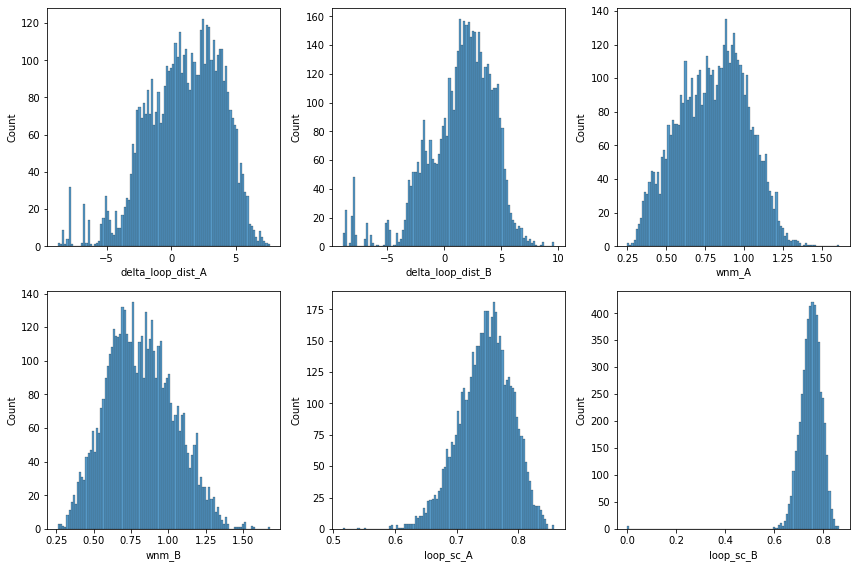

In [6]:
import sys
sys.path.insert(0, '/home/broerman/projects/crispy_shifty/')
from crispy_shifty.plotting.utils import histplot_df

cols = [
        "delta_loop_dist_A",
        "delta_loop_dist_B",
        "wnm_A",
        "wnm_B",
        "loop_sc_A",
        "loop_sc_B",
    ]

# make sure all the columns to plot are numeric
scores_df[cols] = scores_df[cols].astype(float)
histplot_df(scores_df, cols=cols, bins=100)

# pairplot these as well

In [7]:
def filter_df(df, cutoffs):
    filtered_df = df

    for score_term, cutoff, greaterthan in cutoffs:
        if greaterthan:
            filtered_df = filtered_df[filtered_df[score_term] > cutoff]
        else:
            filtered_df = filtered_df[filtered_df[score_term] < cutoff]

    print(len(filtered_df))
    
    return filtered_df

def filter_df_delta(df, parent_df, delta_cutoffs):
    filtered_df = df

    for score_term, parent_term, cutoff, greaterthan in delta_cutoffs:
        filtered_series = filtered_df[score_term]
        parent_scores = parent_df.loc[filtered_df['parent'], parent_term]
        parent_scores.index = filtered_series.index
        # print(filtered_series)
        # print(parent_scores)
        # print(parent_scores - filtered_series < cutoff)
        if greaterthan:
            filtered_df = filtered_df[filtered_series - parent_scores > -cutoff]
        else:
            filtered_df = filtered_df[filtered_series - parent_scores < cutoff]
    
    print(len(filtered_df))
    
    return filtered_df

In [15]:
# Filter designs- remove worst by worst9mer and whether the designs are exploded

cutoffs = [('wnm_A', 0.4, 0),
           ('wnm_B', 0.4, 0),
           ('loop_sc_A', 0.7, 1),
           ('loop_sc_B', 0.7, 1)
]

wnm_filtered_df = filter_df(scores_df, cutoffs)
wnm_filtered_df

4


,abego_str_A,abego_str_B,bb_clash,bb_clash_A,bb_clash_B,closure_type_A,closure_type_B,cms_ac_bn,cms_dhr,cms_dhr_ac,...,wnm_3,wnm_4,wnm_A,wnm_B,wnm_hlx,yhh_planarity,remodel_after_loop_B,remodel_before_loop_B,delta_loop_dist_A,delta_loop_dist_B
/home/broerman/projects/crispy_shifty/projects/crispy_shifty_dimers/03_close_loops/decoys/0000/03_close_loops_3c36359bd62e43f8a9dd72f1746cb670.pdb.bz2,XAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAAAAAAGBAA...,XAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAAAAAAGBAA...,124.98687744140625,61.18562698364258,61.18562698364258,loop_match,loop_match,-1.0,538.6892700195312,719.9497680664062,...,0.17411597073078156,0.18982595205307007,0.340932,0.359412,0.1091337725520134,0.0,NaN,NaN,1.996776,0.742115
/home/broerman/projects/crispy_shifty/projects/crispy_shifty_dimers/03_close_loops/decoys/0000/03_close_loops_b98289a6606b431ab0ce1dc99a978632.pdb.bz2,XAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAAAAAAGBAA...,XAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAAAAAAGBAA...,124.98687744140625,61.18562698364258,61.18562698364258,loop_match,loop_match,-1.0,497.5376281738281,668.7233276367188,...,0.2644160985946655,0.2911382019519806,0.365132,0.360376,0.10475363582372665,0.0,NaN,NaN,2.663754,1.363158
/home/broerman/projects/crispy_shifty/projects/crispy_shifty_dimers/03_close_loops/decoys/0004/03_close_loops_51a5e246d3a846c39e59b85740df2b82.pdb.bz2,XAAAAAAAAAAAAGBBAAAAAAAAAAAAABAAAAAAAAAAAAAGBB...,XAAAAAAAAAAAAGBBAAAAAAAAAAAAABAAAAAAAAAAAAAGBB...,1588.181396484375,63.56321716308594,35.46713638305664,loop_remodel,loop_remodel,-1.0,275.88531494140625,425.0475158691406,...,0.2707420289516449,0.3050196170806885,0.365866,0.304943,0.12767210602760315,0.0012117840313253248,2,3,0.384752,1.189702
/home/broerman/projects/crispy_shifty/projects/crispy_shifty_dimers/03_close_loops/decoys/0002/03_close_loops_0719cbda5a3241dfb9b103c0355b20ad.pdb.bz2,XAAAAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAABAABA...,XAAAAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAABAABA...,153.60484313964844,51.94526290893555,49.930091857910156,loop_match,loop_match,-1.0,379.59112548828125,436.53460693359375,...,0.26398536562919617,0.2642272412776947,0.389183,0.394999,0.1216379851102829,0.0,NaN,NaN,0.313568,-2.311847


In [16]:
# Filter designs- remove worst by worst9mer and whether the designs are exploded

cutoffs = [('wnm_A', 0.5, 0),
           ('wnm_B', 0.5, 0),
           ('loop_sc_A', 0.8, 1),
           ('loop_sc_B', 0.8, 1)
]

sc_filtered_df = filter_df(scores_df, cutoffs)
sc_filtered_df

2


,abego_str_A,abego_str_B,bb_clash,bb_clash_A,bb_clash_B,closure_type_A,closure_type_B,cms_ac_bn,cms_dhr,cms_dhr_ac,...,wnm_3,wnm_4,wnm_A,wnm_B,wnm_hlx,yhh_planarity,remodel_after_loop_B,remodel_before_loop_B,delta_loop_dist_A,delta_loop_dist_B
/home/broerman/projects/crispy_shifty/projects/crispy_shifty_dimers/03_close_loops/decoys/0004/03_close_loops_f24fcfb6080e47ce8ac45a9bbe688dda.pdb.bz2,XAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAAAAAAGBAA...,XAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAAAAAAGBAA...,222.9122314453125,50.16154861450195,53.20732116699219,loop_match,loop_match,-1.0,564.2106323242188,566.6415405273438,...,0.2897711992263794,0.1824842244386673,0.366179,0.454182,0.12270774692296982,0.0,NaN,NaN,-1.413523,-0.266781
/home/broerman/projects/crispy_shifty/projects/crispy_shifty_dimers/03_close_loops/decoys/0002/03_close_loops_438c5b7f83c04aedae78332f350e2ba5.pdb.bz2,XAAAAAAAAAAAAAAAAAAAABABAAAAAAAAAAAAAAAAAAAAAB...,XAAAAAAAAAAAAAAAAAAAABABAAAAAAAAAAAAAAAAAAAAAB...,401.7749938964844,62.273189544677734,62.273189544677734,loop_match,loop_match,-1.0,565.5855712890625,870.3228149414062,...,0.2888840138912201,0.282329797744751,0.358457,0.412582,0.11936096847057343,0.0,NaN,NaN,-2.336515,1.708519


In [18]:
# Get a random sample for another 4 designs to test
sample_df = scores_df.sample(4)
sample_df

In [21]:
import shutil
for df in [wnm_filtered_df, sc_filtered_df, sample_df]:
    for file in df.index:
        shutil.copy(file, '/home/broerman/projects/crispy_shifty/projects/crispy_shifty_dimers/testing/alphafold_one_state_dimers/inputs/')

## Everything after this is for testing ##

In [1]:
import pyrosetta
from pyrosetta.distributed.cluster.io import IO
print(IO.REMARK_FORMAT)
IO.REMARK_FORMAT = 'REMARK CrispyShifty: '
print(IO.REMARK_FORMAT)
path = '/home/broerman/projects/crispy_shifty/projects/crispy_shifty_dimers/02_design_filter_3/decoys/0006/_5fc0cbb34e88485690c5fd78d411902d.pdb.bz2'
scores = pyrosetta.distributed.cluster.get_scores_dict(path)["scores"]

/projects/crispy_shifty/envs/crispy/lib/python3.8/site-packages/dask_jobqueue/core.py:20: FutureWarning: tmpfile is deprecated and will be removed in a future release. Please use dask.utils.tmpfile instead.
  from distributed.utils import tmpfile


REMARK PyRosettaCluster: 
REMARK CrispyShifty: 


In [1]:
import pyrosetta
import pyrosetta.distributed.cluster as cluster
path = '/home/broerman/projects/crispy_shifty/projects/crispy_shifty_dimers/03_close_loops_test/decoys/0000/03_close_loops_8bf01523165b483b9193640cfdc02091.pdb.bz2'
scores = pyrosetta.distributed.cluster.get_scores_dict(path)["scores"]
print(scores)

/projects/crispy_shifty/envs/crispy/lib/python3.8/site-packages/dask_jobqueue/core.py:20: FutureWarning: tmpfile is deprecated and will be removed in a future release. Please use dask.utils.tmpfile instead.
  from distributed.utils import tmpfile


In [3]:
# Fix the use of REMARK CrispyShifty" instead of "REMARK PyRosettaCluster" 

from glob import iglob
import bz2
# filepath = "/home/broerman/projects/crispy_shifty/projects/crispy_shifty_dimers/02_design_filter_2/decoys/"
# filepath = "/home/broerman/projects/crispy_shifty/projects/crispy_shifty_dimers/02_design_filter_3/decoys/"
# filepath = "/home/broerman/projects/crispy_shifty/projects/crispy_shifty_dimers/03_close_loops_test/decoys/"
for filename in iglob(filepath + '*/*.pdb.bz2'):
    with open(filename, "rb") as fbz2:
        pdbstring = bz2.decompress(fbz2.read()).decode()
    split_pdbstr = pdbstring.split(os.linesep)
    for i, line in enumerate(reversed(split_pdbstr)):
        if line.startswith("REMARK CrispyShifty"):
            newline = line.replace("CrispyShifty", "PyRosettaCluster")
            split_pdbstr[-i-1] = newline
            with(open(filename, "wb")) as fbz2:
                fbz2.write(bz2.compress(os.linesep.join(split_pdbstr).encode()))
            break

In [2]:
sys.path.insert(0, "/home/broerman/projects/crispy_shifty")
from crispy_shifty.utils.io import gen_array_tasks

design_list_file = "/home/broerman/projects/crispy_shifty/projects/crispy_shifty_dimers/02_design_filter_3/filtered_designs (copy).list"
output_path = "/home/broerman/projects/crispy_shifty/projects/crispy_shifty_dimers/testing/03_close_loops_design"

# Format as a string of key value pairs with no leading dashes on the argument names
options = "out:level 100 holes:dalphaball /home/bcov/ppi/tutorial_build/main/source/external/DAlpahBall/DAlphaBall.gcc indexed_structure_store:fragment_store /home/bcov/sc/scaffold_comparison/data/ss_grouped_vall_all.h5 precompute_ig true"

gen_array_tasks(distribute_func='crispy_shifty.protocols.looping.loop_dimer',
                design_list_file=design_list_file,
                output_path=output_path,
                queue='short',
                memory='8G',
                nstruct=1,
                nstruct_per_task=1,
                options=options,
                simulation_name='03_close_loops')

Run the following command with your desired environment active:
sbatch -a 1-$(cat /home/broerman/projects/crispy_shifty/projects/crispy_shifty_dimers/testing/03_close_loops_design/tasks.cmds | wc -l) /home/broerman/projects/crispy_shifty/projects/crispy_shifty_dimers/testing/03_close_loops_design/run.sh


In [6]:
# testing

sys.path.insert(0, "/home/broerman/projects/crispy_shifty")
from crispy_shifty.protocols.looping import loop_dimer
import pyrosetta.distributed.io as io

pyrosetta.distributed.maybe_init(**{
    "options": "-corrections::beta_nov16 true",
    "extra_options":{
        "-out:level": "100",
        "-holes:dalphaball": "/home/bcov/ppi/tutorial_build/main/source/external/DAlpahBall/DAlphaBall.gcc",
        "-indexed_structure_store:fragment_store": "/home/bcov/sc/scaffold_comparison/data/ss_grouped_vall_all.h5",
        "-precompute_ig": "true"
}})

file = '/home/broerman/projects/crispy_shifty/projects/crispy_shifty_dimers/02_design_filter/decoys/0000/02_design_filter_0a0e27de4de64d10b9c4272024e98bf8.pdb.bz2'

pposes = loop_dimer(**{'pdb_path': file})

for ppose in pposes:
    pose = io.to_pose(ppose)
    pose.dump_pdb(f'testing/loop_dimer_test_scored.pdb')

0.03 min: Attempting closure by loop match...success.
0.06 min: Scoring...complete.
0.10 min: Attempting closure by loop match...


ERROR: No loop closures found below threshold, exiting
ERROR:: Exit from: /home/benchmark/rosetta/source/src/protocols/pose_length_moves/ConnectChainsMover.cc line: 221


failed.
0.11 min: Attempting closure by loop remodel...      4.574999999999999       9.712999999999999      -8.512999999999998
success.
0.50 min: Scoring...complete.


In [ ]:
import bz2
with open('testing/unloopable.pdb', 'rb') as f_in:
    with open('testing/unloopable.pdb.bz2', 'wb') as f_out:
        f_out.write(bz2.compress(f_in.read()))

In [8]:
# testing

sys.path.insert(0, "/home/broerman/projects/crispy_shifty")
from crispy_shifty.protocols.looping import loop_dimer
import pyrosetta.distributed.io as io

pyrosetta.distributed.maybe_init(**{
    "options": "-corrections::beta_nov16 true",
    "extra_options":{
        "-out:level": "100",
        "-holes:dalphaball": "/home/bcov/ppi/tutorial_build/main/source/external/DAlpahBall/DAlphaBall.gcc",
        "-indexed_structure_store:fragment_store": "/home/bcov/sc/scaffold_comparison/data/ss_grouped_vall_all.h5",
        "-precompute_ig": "true"
}})

file = 'testing/unloopable.pdb.bz2'

pposes = loop_dimer(**{'pdb_path': file})

for ppose in pposes:
    pose = io.to_pose(ppose)
    pose.dump_pdb(f'testing/unloopable_dimer_test.pdb')

0.08 min: Attempting closure by loop match...


ERROR: No loop closures found below threshold, exiting
ERROR:: Exit from: /home/benchmark/rosetta/source/src/protocols/pose_length_moves/ConnectChainsMover.cc line: 221


failed.
4.23 min: Attempting closure by loop remodel...      52.65600000000000       39.76900000000000       35.24300000000000
failed.
